In [5]:
import matplotlib.pyplot as plt
import numpy as np
import dplm_base

%matplotlib inline

In [12]:
dplm_instance = dplm_base.dplm('para1.csv')
dplm_instance.show_dplm_config()
dplm_instance.set_dplm_slot_num(20)
dplm_instance.set_dplm_spring_num(3)
# dplm_instance.set_springs_positions([0.16,0.16,0.16])
dplm_instance.set_dplm_spring_constants([300,300,300])
dplm_instance.set_dplm_spring_lengths([0.16,0.16,0.16])
dplm_instance.set_dplm_allowed_angle_range(-20, 60, 1)
dplm_instance.set_slot([-6, -2, 18])
moment_weight, moment_spring_list, moment_total = dplm_instance.calculate_current_moment()
lower_limit, upper_limit, step_size, total_angle_num = dplm_instance.get_allowed_angle_range().values()

Column names are linkage, length, mass
alpha_o1o_1:0
alpha_o2o4:0
alpha_o2o_2:0
alpha_o3o_3:0
alpha_o4o_4:0
alpha_o_1o_2:0
l_o1o2:0.254
l_o1o3:0.10699999999999998
l_o1o_1:0.762
l_o2o4:0.615
l_o2o_2:0.762
l_o3o4:0.254
l_o3o_3:0.648
l_o4o_4:0.648
l_o_1o_2:0.254
l_o_3o_4:0.254
m_o1o2:0.29870661
m_o1o_1:0.84734661
m_o2o4:0.67904403
m_o2o_2:0.84734661
m_o3o_3:0.72422661
m_o4o_4:0.72422661
m_o_1o_2:0.29870661
r_o1o_1:0.381
r_o2o4:0.3075
r_o2o_2:0.381
r_o3o_3:0.324
r_o4o_4:0.324
r_o_1o_2:0.127
The number of slots is set to 20
Set_slot: spring positions are [-0.24063157894736842, -0.08021052631578947, 0.7218947368421053]
caching moment_weight
caching new moment_spring
caching new moment_spring
caching new moment_spring


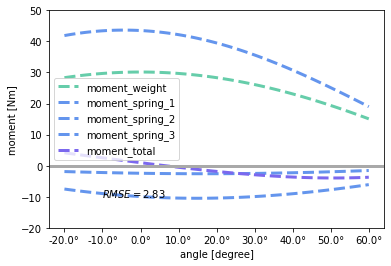

2.8341530851243384


In [13]:
a,b,c = dplm_instance.calculate_current_moment()
%matplotlib inline
plt.cla()    
plt.plot(range(lower_limit, upper_limit+1), a, label = 'moment_weight', ls = '--', lw = 3, color = 'mediumaquamarine')

ax = plt.gca()

for i in range(len(moment_spring_list)):
    plt.plot(range(lower_limit,upper_limit+1), b[i], label = 'moment_spring_{}'.format(i+1), ls = '--', lw = 3, color = 'cornflowerblue')

plt.plot(range(lower_limit, upper_limit+1), c, label = 'moment_total', ls = '--', lw = 3, color = 'mediumslateblue')
plt.axhline(y = 0, ls = '-', lw = 3, color = 'darkgrey')

plt.axis(ymin=-20, ymax=50)
plt.legend()
plt.xlabel('angle [degree]')
plt.ylabel('moment [Nm]')
ax.xaxis.set_major_formatter('{x}°')


plt.text(-10,-10, r'$RMSE={:.2f}$'.format(dplm_instance.current_rmse()))


plt.show()

print(dplm_instance.current_rmse())

In [17]:
spring_num = 3
action_per_spring_num = 4
action_per_spring = [-1, 1, -3, 3]

action_array = []
for spring in range(spring_num):
    for action in range(action_per_spring_num):
        lst = [0]*spring_num
        lst[spring] = action_per_spring[action]
        action_array.append(lst)

print(action_array)

[[-1, 0, 0], [1, 0, 0], [-3, 0, 0], [3, 0, 0], [0, -1, 0], [0, 1, 0], [0, -3, 0], [0, 3, 0], [0, 0, -1], [0, 0, 1], [0, 0, -3], [0, 0, 3]]


In [20]:
slot_num = 20
spring_num = 3
for k in range(30):
    state = [np.random.randint(-slot_num, slot_num+1) for i in range(spring_num)] 
    print(state)

[11, 16, 8]
[10, -20, 17]
[5, -15, -3]
[12, 12, 7]
[4, 13, -4]
[11, -9, 5]
[3, -17, -3]
[-17, -6, -4]
[19, -18, -11]
[3, 12, -3]
[-7, -11, 13]
[5, -20, -1]
[20, -2, 5]
[-14, 4, -2]
[-12, 18, -16]
[7, 12, -2]
[-4, -14, 20]
[15, -3, 18]
[10, -10, -18]
[19, -18, 12]
[-9, 18, -3]
[12, -10, 9]
[17, 8, -2]
[16, -8, -17]
[-7, 14, -2]
[7, -2, 1]
[-17, 2, -14]
[-17, 4, -18]
[-17, 11, -20]
[17, -8, 19]


In [2]:
import gym
import math
import os
import time
import matplotlib.pyplot as plt

%matplotlib inline

cwd = os.getcwd()
angle_range = {
    'lower_limit' : -20,
    'upper_limit' : 60,
    'step_size' : 1
}

env = gym.make('gym_dplm:dplm-v0', 
                dplm_config_file = cwd+"/para1.csv",
                spring_num = 3,
                slot_num = 20,
                spring_constants = [300,300,300],
                spring_init_lengths = [0.16,0.16,0.16],
                **angle_range)

for i_episode in range(100):
    observation = env.reset()
    print(observation)
    print(observation)
    print(observation)
    for ti in range(100):
        # plt.ion()
        # plt.imshow(env.render(mode='rgb_array'))
        # display.display(plt.gcf())    
        env.render(mode = 'text')
        print('observation is :{}'.format(observation))
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("episode finished after {} timesteps".format(t+1))
            break
        # time.sleep(0.5)
env.close()

Column names are linkage, length, mass
The number of slots is set to 20


<Figure size 432x288 with 0 Axes>

Set_slot: spring positions are [0.3208421052631579, 0.5213684210526316, 0.4010526315789473]
caching moment_weight
caching new moment_spring
caching new moment_spring
caching new moment_spring
Reset: spring_num is 3. slot_num is<bound method dplm.get_slot_num of <dplm_base.dplm object at 0x7fb055eddb50>>.
Reset: self state is [27, 32, 29]. New positions are [8, 13, 10]
[27 32 29]
[27 32 29]
[27 32 29]
Render: state: [27, 32, 29], rmse: None
observation is :[27 32 29]
Step: action is 7
Set_slot: spring positions are [0.3208421052631579, 0.6416842105263157, 0.4010526315789473]
caching new moment_spring
Step: new state is [27, 35, 29]
Step: new positions are [8, 16, 10].
Render: state: [27, 35, 29], rmse: 33.21431916274516
observation is :[27 35 29]
Step: action is 9
Set_slot: spring positions are [0.3208421052631579, 0.6416842105263157, 0.4411578947368421]
caching new moment_spring
Step: new state is [27, 35, 30]
Step: new positions are [8, 16, 11].
Render: state: [27, 35, 30], rmse: 35.6

KeyboardInterrupt: 

In [1]:
import gym
import math
import os
import time
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

# %matplotlib widget

cwd = os.getcwd()
angle_range = {
    'lower_limit' : -20,
    'upper_limit' : 60,
    'step_size' : 1
}

env = gym.make('gym_dplm:dplm-v0', 
                dplm_config_file = cwd+"/para1.csv",
                spring_num = 3,
                slot_num = 20,
                spring_constants = [300,300,300],
                spring_init_lengths = [0.16,0.16,0.16],
                **angle_range)

check_env(env)

Column names are linkage, length, mass
The number of slots is set to 20


<Figure size 432x288 with 0 Axes>

Set_slot: spring positions are [-0.601578947368421, -0.5614736842105262, -0.12031578947368421]
caching moment_weight
caching new moment_spring
caching new moment_spring
caching new moment_spring
Reset: spring_num is 3. slot_num is<bound method dplm.get_slot_num of <dplm_base.dplm object at 0x000001CA6F9E43D0>>.
Reset: self state is [4, 5, 16]. New positions are [-15, -14, -3]
Step: action is 10
Set_slot: spring positions are [-0.601578947368421, -0.5614736842105262, -0.24063157894736842]
caching new moment_spring
Step: new state is [4, 5, 13]
Step: new positions are [-15, -14, -6].
Step: action is 4
Set_slot: spring positions are [-0.601578947368421, -0.601578947368421, -0.24063157894736842]
Step: new state is [4, 4, 13]
Step: new positions are [-15, -15, -6].
Step: action is 3
Set_slot: spring positions are [-0.48126315789473684, -0.601578947368421, -0.24063157894736842]
caching new moment_spring
Step: new state is [7, 4, 13]
Step: new positions are [-12, -15, -6].
Step: action is 4
S

In [12]:
import gym
import math
import os
import time

from stable_baselines3 import DQN, A2C
from stable_baselines3.common.cmd_util import make_vec_env

cwd = os.getcwd()
angle_range = {
    'lower_limit' : -20,
    'upper_limit' : 60,
    'step_size' : 1
}

env = gym.make('gym_dplm:dplm-v0', 
                dplm_config_file = cwd+"/para1.csv",
                spring_num = 3,
                slot_num = 20,
                spring_constants = [300,300,300],
                spring_init_lengths = [0.16,0.16,0.16],
                **angle_range)

env = make_vec_env(lambda: env, n_envs=40)

model = A2C('MlpPolicy', env, verbose=1).learn(50000)
model.save('dplm')

# Test the trained agent
for i in range(10):
    print('Test: NO.{}'.format(i+1))
    obs = env.reset()
    n_steps = 1000
    for step in range(n_steps):
        action, _ = model.predict(obs, deterministic=True)
        print("Step {}".format(step + 1))
        print("Action: ", action)
        obs, reward, done, info = env.step(action)
        print('obs=', obs, 'reward=', reward, 'done=', done)
        # env.render()
        if done.any():
            # Note that the VecEnv resets automatically
            # when a done signal is encountered
            print("Goal reached!", "reward=", reward)
            break

Column names are linkage, length, mass
The number of slots is set to 20


<Figure size 432x288 with 0 Axes>

Using cuda device
-------------------------------------
| time/                 |           |
|    fps                | 4419      |
|    iterations         | 100       |
|    time_elapsed       | 4         |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -2.48     |
|    explained_variance | -2.86e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -2.63e+03 |
|    value_loss         | 9.54e+06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 4516      |
|    iterations         | 200       |
|    time_elapsed       | 8         |
|    total_timesteps    | 40000     |
| train/                |           |
|    entropy_loss       | -2.47     |
|    explained_variance | -2.98e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -2.59e

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1]:
import torch 
from torch import nn 


print(torch.cuda.is_available()) # true 查看GPU是否可用

print(torch.cuda.device_count()) #GPU数量， 1

torch.cuda.current_device() #当前GPU的索引， 0

torch.cuda.get_device_name(0) #输出GPU名称

True
1


'GeForce GTX 1080 Ti'